In [16]:
infile = open('signal.txt','r') # file should be in same folder as this notebook
inp = infile.read() # noisy signal
infile.close()

import matplotlib.pyplot as plt

print(inp)
print(type(inp))
inp

s = []

for i in inp:
    if i == ' ':
        pass
    if i == '':
        pass
    else:
        s.append(float(i))




x = [_ for _ in range(len(s))]

print(s)
print(x)
print(len(x))
print(len(s))

plt.plot(x,s)

   9.7025510294637074e-01
   9.5603968037148901e-01
   8.7115559966798106e-01
   1.0323970330260082e+00
   1.0073324519243720e+00
   1.0670651739493564e+00
   9.7203759678385748e-01
   1.0022865534592840e+00
   9.3451252042475264e-01
   9.9485148880945362e-01
   1.0147535621303805e+00
   9.9517833892193230e-01
   9.6634117793103469e-01
   9.9758729052940343e-01
   1.0509092848683568e+00
   1.0246340327362258e+00
   9.0780960376834263e-01
   9.2981358203838638e-01
   9.6883939348764248e-01
   9.5997870000692032e-01
   1.0944548646414496e+00
   1.1467843586178734e+00
   1.1235538323686478e+00
   1.0062949968535635e+00
   1.0221584441861318e+00
   8.9071849387018220e-01
   9.1994157404138721e-01
   1.0081613004426702e+00
   1.0026684495679410e+00
   1.0376203234934329e+00
   1.0879531252893448e+00
   8.8292295665551168e-01
   9.8647032327218132e-01
   1.0470803667284263e+00
   9.8248002983947957e-01
   9.9290206502273082e-01
   9.6648412445288956e-01
   1.0586999609849079e+00
   1.0079419

ValueError: could not convert string to float: ' '

In [11]:
print(float('2.0694515707196435e+00'))

2.0694515707196435


[0.9702551029463707, 0.956039680371489, 0.8711555996679811, 1.0323970330260082, 1.007332451924372, 1.0670651739493564, 0.9720375967838575, 1.002286553459284, 0.9345125204247526, 0.9948514888094536, 1.0147535621303805, 0.9951783389219323, 0.9663411779310347, 0.9975872905294034, 1.0509092848683568, 1.0246340327362258, 0.9078096037683426, 0.9298135820383864, 0.9688393934876425, 0.9599787000069203, 1.0944548646414496, 1.1467843586178734, 1.1235538323686478, 1.0062949968535635, 1.0221584441861318, 0.8907184938701822, 0.9199415740413872, 1.0081613004426702, 1.002668449567941, 1.037620323493433, 1.0879531252893448, 0.8829229566555117, 0.9864703232721813, 1.0470803667284263, 0.9824800298394796, 0.9929020650227308, 0.9664841244528896, 1.058699960984908, 1.0079419861802674, 0.9968113540176188, 0.8697881589340408, 0.9124002235215241, 0.9525860980040837, 1.0184525900560595, 1.0649425199297606, 1.0597596636378992, 1.04913667972676, 0.9851120593165468, 1.0830312636585564, 0.9985939154249082, 1.14033

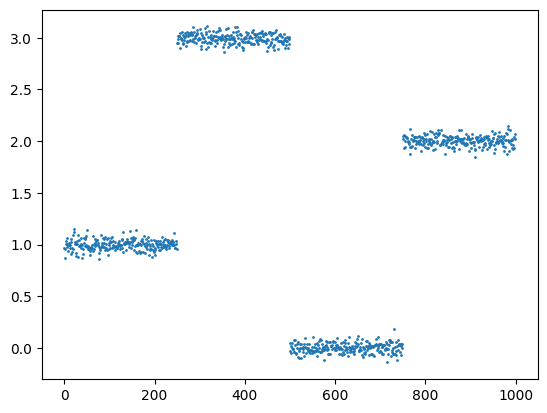

In [26]:
x = []
file_in = open('signal.txt', 'r')
for y in file_in.read().split('\n'):
    try:
        x.append(float(y))
    except:
        pass

print(x)

plt.scatter(range(len(x)),x, s=1)